# XANES

In [115]:
%matplotlib notebook
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from daxs.measurements import Source, Xas, Xes
from scipy.integrate import simpson

In [116]:
q = '4e'
file = r'C:\Users\oppcexpv\Downloads\ihch1632\ihch1632\id26\20220826\191_'+ q + r'\191_' + q + r'_xanes\191_' + q + r'_xanes.h5'
file = file.replace('\\', '/')

a = np.linspace(3.1, 102.1, 100)
b = np.linspace(3.2, 102.2, 100)

TSY = []
TSZ = []
energy = []
gdall = []
I0t = []

with h5py.File(file, 'r') as f:
    for i in a:
        #print(i)
        g = f.get('%s/instrument/hdh_energy' %f'{i}')
        energy.append(np.array(g.get('data')))
        h = f.get('%s/instrument/gdall' %f'{i}')
        gdall.append(np.array(h.get('data')))
        l = f.get('%s/instrument/I0t' %f'{i}')
        I0t.append(np.array(l.get('data')))
    
    for i in b:
        #print(i)
        g = f.get('%s/instrument/TSY_cnt' %f'{i}')
        TSY.append(np.array(g.get('data'))[0])
        h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
        TSZ.append(np.array(h.get('data'))[0])
    

In [117]:
intensity = []

for i in range(len(energy)): #100 scans
    intensity.append(np.divide(gdall[i], I0t[i]))

In [120]:
len(intensity), len(intensity[0])

(100, 429)

In [128]:
a = [3,5,8,9,11]
intensity[a[0]]

array([-0.        , -0.96969697,  0.01311993,  0.01256393,  0.01377149,
        0.01420869,  0.0136852 ,  0.01183456,  0.01205651,  0.01255541,
        0.0131173 ,  0.01324969,  0.00961889,  0.01455684,  0.01454095,
        0.01843963,  0.01445021,  0.01294848,  0.01588408,  0.01432886,
        0.01996049,  0.01535345,  0.01298729,  0.01736602,  0.01548333,
        0.01087695,  0.01514164,  0.01277652,  0.01320272,  0.01198656,
        0.01280712,  0.01594401,  0.01456167,  0.01406006,  0.01641135,
        0.01787005,  0.01334299,  0.0149736 ,  0.00825575,  0.01297327,
        0.01276004,  0.01629881,  0.0103945 ,  0.0122896 ,  0.01448283,
        0.01525692,  0.01529195,  0.01433097,  0.01424137,  0.01453224,
        0.01353256,  0.01341212,  0.01541587,  0.01325408,  0.01893098,
        0.01869822,  0.0180031 ,  0.01090313,  0.01486079,  0.01431523,
        0.01004873,  0.01431671,  0.00902277,  0.01010123,  0.01711349,
        0.01242264,  0.01267798,  0.01260689,  0.01152101,  0.01

In [129]:
data = []
for i in a:
    data.append(intensity[i])
    
Data = pd.DataFrame(data)
    

In [130]:
Data

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,-0.000000,-0.969697,0.013120,0.012564,0.013771,0.014209,0.013685,0.011835,0.012057,0.012555,...,0.375092,0.349855,0.362072,0.377546,0.362515,0.370481,0.323117,0.382581,0.367789,0.360925
1,-0.000000,-0.000000,0.018794,0.014751,0.018207,0.010749,0.013652,0.014241,0.015273,0.017242,...,0.371199,0.330692,0.327728,0.372464,0.343825,0.359988,0.360532,0.335262,0.353612,0.345390
2,-0.000000,-0.000000,0.014617,0.017341,0.015236,0.014860,0.016261,0.017359,0.014277,0.018322,...,0.335216,0.357806,0.367520,0.380050,0.358674,0.364879,0.389846,0.358493,0.380297,0.349597
3,0.000000,-32.000000,0.014486,0.011591,0.010118,0.011452,0.014667,0.011885,0.011368,0.013267,...,0.295227,0.283324,0.292381,0.295548,0.295083,0.283466,0.320733,0.295642,0.285895,0.286574
4,1.066667,-0.000000,0.009775,0.012096,0.010392,0.010208,0.010505,0.011712,0.009315,0.012179,...,0.265878,0.250010,0.251366,0.257510,0.260827,0.249858,0.272288,0.262487,0.281393,0.287110


In [112]:
ok = []
ok_3 = []
max_intensity = []
for n in range(len(energy)): 
    head =  intensity[n][:50]
    head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
    tail = intensity[n][-50:]
    tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
    middle = intensity[n][200:250]
    middle = middle[abs(stats.zscore(middle))<2]
    if ((tail.mean()/head.mean() > 0.7) and (middle.mean()>head.mean())): #####################################
        ok.append(n)
        ok_3.append(n+3)
    
    peak = intensity[n][100:250]
    for i in range(2,len(peak)-2):
        before = peak[i-2:i].mean()
        after = peak[i+1:i+3].mean()
        low =  peak[i-2:i+3].min()
        if peak[i]-low > 4*(before-low + after-low)/2:
            peak[i] = (before + after)/2
    max_intensity.append(simpson(peak))
    
    
print(len(ok))

100


In [113]:
for i in range(len(max_intensity)):
    max_intensity[i] = (max_intensity[i]-min(max_intensity))/(max(max_intensity)-min(max_intensity))
for i in range(len(max_intensity)):
    max_intensity[i] = (max_intensity[i]-min(max_intensity))/(max(max_intensity)-min(max_intensity))
for i in range(len(max_intensity)):
    max_intensity[i] = (max_intensity[i]-min(max_intensity))/(max(max_intensity)-min(max_intensity))

<IPython.core.display.Javascript object>


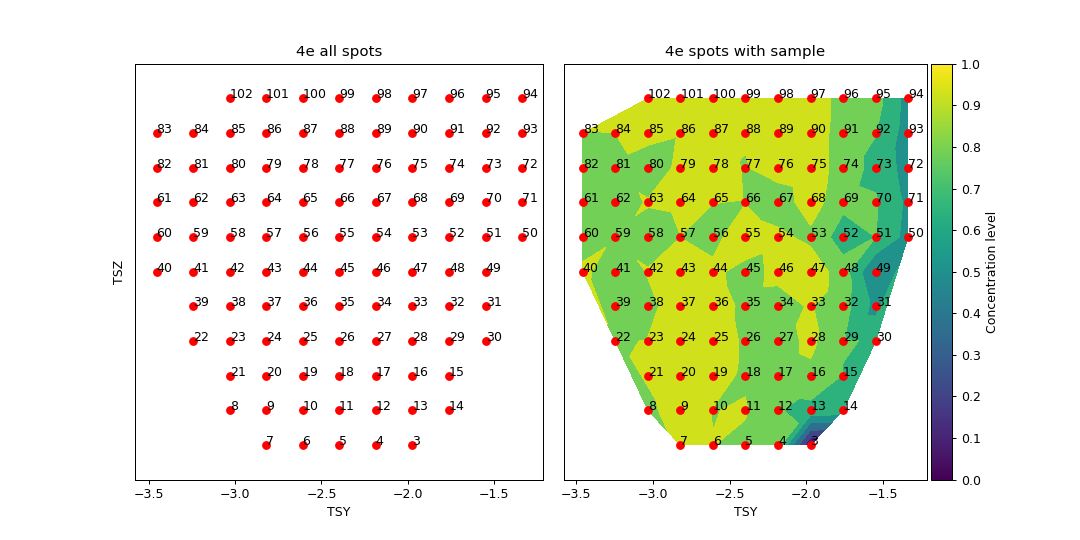

C:\Users\oppcexpv\AppData\Local\Temp\ipykernel_27500\1160402964.py:15: UserWarning: The following kwargs were not used by contour: 'level'
  ax2.tricontourf(TSY,TSZ,max_intensity, level=100)


Text(0.5, 1.0, '4e spots with sample')

In [114]:
fig = plt.figure(figsize=(12, 6), dpi=100)
grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.05)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1], sharey=ax1)

cmap = plt.cm.get_cmap()
norm = mpl.colors.Normalize(vmin = 0, vmax = 1)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
colors = plt.cm.jet(np.linspace(0, 1, 100))
ticks = np.linspace(0, 1, 11)
cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                    shrink=1.0, fraction=0.1, pad=0.01, label='Concentration level')

ax2.tricontourf(TSY,TSZ,max_intensity, level=100)
for i in ok:
    ax2.scatter(TSY[i], TSZ[i] ,color = 'red')
    ax2.text(TSY[i], TSZ[i], i+3)

for i in range(len(TSY)):
    ax1.scatter(TSY[i], TSZ[i], color = 'red')
    ax1.text(TSY[i], TSZ[i], i+3)

ax1.set_xlabel('TSY')
ax2.set_xlabel('TSY')
ax1.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
ax2.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
ax1.set_ylim(min(TSZ)-0.1, max(TSZ)+0.1)
ax1.set_ylabel('TSZ')
ax2.set_yticks([])
ax1.set_title('%s all spots'%q)
ax2.set_title('%s spots with sample'%q)
#plt.savefig('%s spots.png'%q, bbox_inches='tight')

<IPython.core.display.Javascript object>


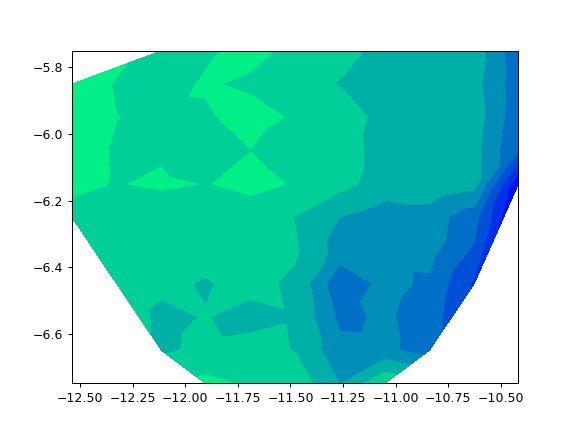

C:\Users\oppcexpv\AppData\Local\Temp\ipykernel_27500\556421343.py:3: UserWarning: The following kwargs were not used by contour: 'level'
  plt.tricontourf(TSY,TSZ,max_intensity, level=50, cmap='winter')


In [76]:
plt.figure()

plt.tricontourf(TSY,TSZ,max_intensity, level=50, cmap='winter')

<IPython.core.display.Javascript object>


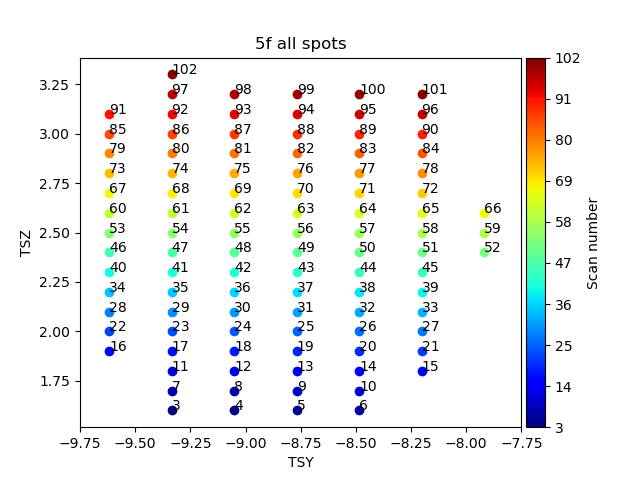

In [228]:
fig=plt.figure()

cmap = plt.cm.get_cmap("jet")
norm = mpl.colors.Normalize(vmin = 3, vmax = 102)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
colors = plt.cm.jet(np.linspace(0, 1, 100))
ticks = np.linspace(3, 102, 10)
cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                    shrink=1.0, fraction=0.1, pad=0.01, label='Scan number')
''' 
for i in ok:
    plt.scatter(TSY[i-3], TSZ[i-3])#, color=colors[i])
    plt.text(TSY[i-3], TSZ[i-3], i)
'''   
for i in range(len(TSY)):
    plt.scatter(TSY[i], TSZ[i], color=colors[i])
    plt.text(TSY[i], TSZ[i], i+3)

plt.xlabel('TSY')
plt.xlim(-9.75,-7.75)
plt.ylabel('TSZ')
plt.title('5f all spots')
plt.savefig('5f all spots.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


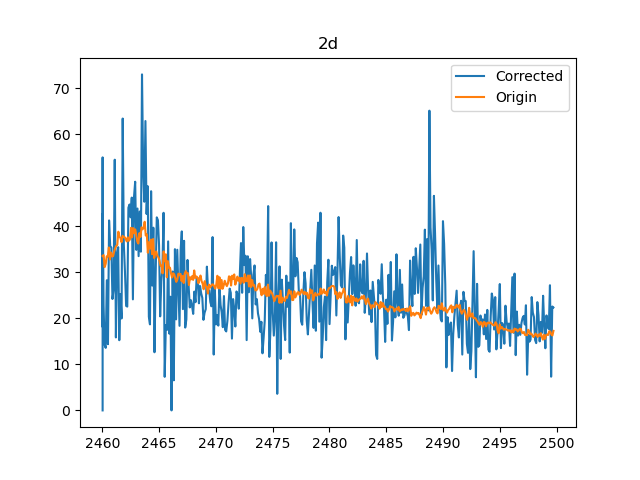

In [73]:
counter_XAS = {'x':'hdh_energy', 'signal':"gdall", "monitor":"I0t"}
source = Source(file, ok_3) #3-102 for XAS, #1-12 for XES
measurment_XAS = Xas(source,counters=counter_XAS)
measurment_XAS.find_outliers()
measurment_XAS.remove_outliers()
measurment_XAS.normalize(mode = 'area')

source2 = Source(file, list(range(3,102)), None) #3-102 for XAS, #1-12 for XES
measurment_XAS2 = Xas(source2,counters=counter_XAS)
measurment_XAS2.find_outliers()
measurment_XAS2.remove_outliers()
measurment_XAS2.normalize(mode = 'area')
np.savetxt(q+'_XAS_BT2.txt',np.c_[measurment_XAS2.x*1000, measurment_XAS2.signal] )
fig=plt.figure()

plt.plot(measurment_XAS.x*1000, measurment_XAS.signal, label='Corrected')
plt.plot(measurment_XAS2.x*1000, measurment_XAS2.signal, label='Origin')

plt.title('%s'%q)
plt.legend()
#plt.savefig('5f correction.png', bbox_inches='tight')

In [150]:
n=7
intensity[n][:50].mean(),intensity[n][-50:].mean()
print(intensity[n][-50:].mean()/intensity[n][:50].mean())

1.8072518667302107


In [151]:
n=0
intensity[n][:50].mean(),intensity[n][-50:].mean()
print(intensity[n][-50:].mean()/intensity[n][:50].mean())

0.58344173236219


<IPython.core.display.Javascript object>


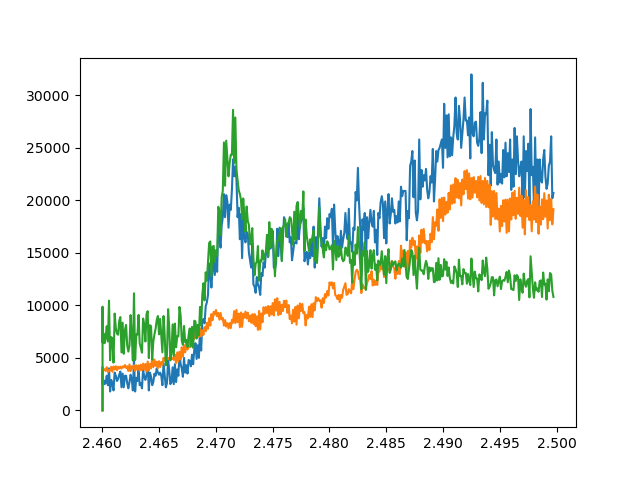

In [143]:
n = 7
fig=plt.figure()
plt.plot(energy[n],gdall[n]*100)
plt.plot(energy[n],I0t[n])
plt.plot(energy[n], intensity[n]*1000000)

# XES


In [148]:
q = '5b'
file = r'C:\Users\oppcexpv\Downloads\252_data\252-' + q + r'\252-' + q + r'_xes\252-' + q + r'_xes.h5'
file = file.replace('\\', '/')

a = np.linspace(3.1, 12.1, 10)

energy = []
gdall = []
I0t = []
TSY = []
TSZ = []

with h5py.File(file, 'r') as f:
    for i in a:
        #print(i)
        g = f.get('%s/instrument/xes_en_texs' %f'{i}')
        energy.append(np.array(g.get('data')))
        h = f.get('%s/instrument/gdall' %f'{i}')
        gdall.append(np.array(h.get('data')))
        l = f.get('%s/instrument/I0t' %f'{i}')
        I0t.append(np.array(l.get('data')))
        g = f.get('%s/instrument/TSY_cnt' %f'{i}')
        TSY.append(np.array(g.get('data'))[0])
        h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
        TSZ.append(np.array(h.get('data'))[0])

intensity = []
for i in range(len(energy)):
    intensity.append(np.divide(gdall[i], I0t[i]))    

In [149]:
ok = []
ok_3 = []
for n in range(len(energy)): 
    head =  intensity[n][:10]
    head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
    tail = intensity[n][-10:]
    tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
    middle = intensity[n][30:50]
    #middle = middle[abs(stats.zscore(middle))<2]
    
    if ((middle.mean()>tail.mean()*1.15) and (middle.mean()>head.mean()*1.15)): #####################################
        ok.append(n)
        ok_3.append(n+3)
print(len(ok))
print(ok_3)

2
[5, 9]


In [144]:
n=6
head =  intensity[n][:10]
head1 = head[abs(stats.zscore(head))<1]  #remove outlier, z-score>3
tail = intensity[n][-10:]
tail1 = tail[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
middle = intensity[n][30:50]
#middle = middle[abs(stats.zscore(middle))<2]
    
len(head1),  len(tail1), head1.mean(), tail1.mean(), middle.mean(), middle.mean()/head1.mean()

(7,
 10,
 0.0037830614763249342,
 0.0037413147929433225,
 0.004409040706439387,
 1.1654689552448305)

<IPython.core.display.Javascript object>


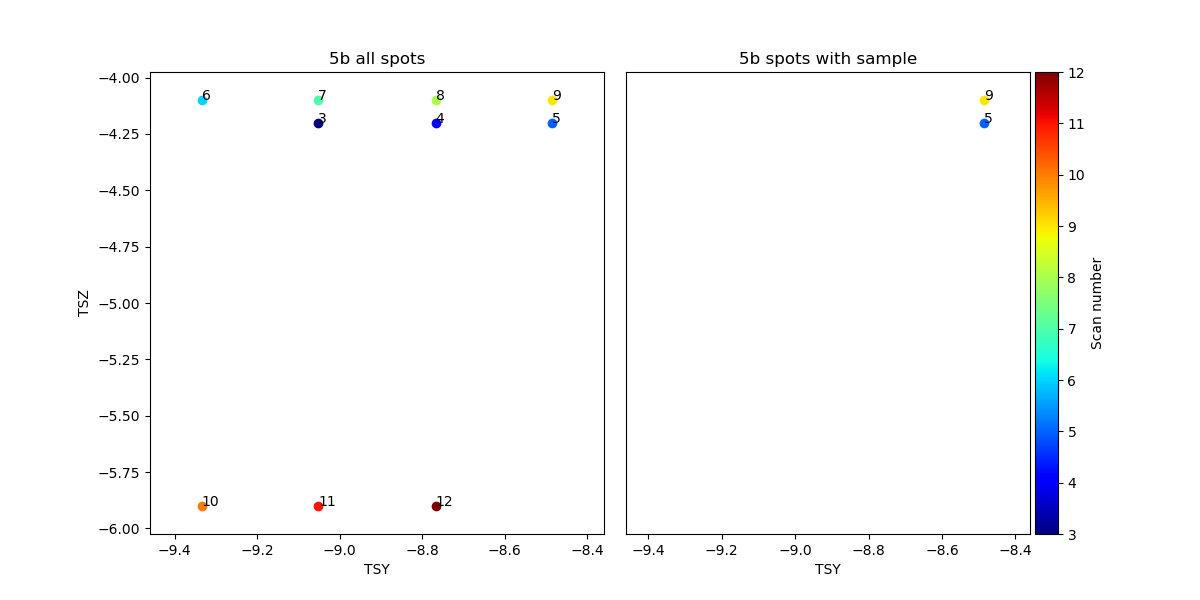

' '

In [154]:
fig = plt.figure(figsize=(12, 6), dpi=100)
grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.05)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])

cmap = plt.cm.get_cmap("jet")
norm = mpl.colors.Normalize(vmin = 3, vmax = 12)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
colors = plt.cm.jet(np.linspace(0, 1, 10))
ticks = np.linspace(3, 12, 10)
cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                    shrink=1.0, fraction=0.1, pad=0.01, label='Scan number')

for i in ok:
    ax2.scatter(TSY[i], TSZ[i] ,color = colors[i])
    ax2.text(TSY[i], TSZ[i], i+3)
   
for i in range(len(TSY)):
    ax1.scatter(TSY[i], TSZ[i], color = colors[i])
    ax1.text(TSY[i], TSZ[i], i+3)
    
ax1.set_xlabel('TSY')
ax2.set_xlabel('TSY')
ax1.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
ax2.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
ax1.set_ylim(min(TSZ)-0.125, max(TSZ)+0.125)
ax2.set_ylim(min(TSZ)-0.125, max(TSZ)+0.125)
ax1.set_ylabel('TSZ')
ax2.set_yticks([])
ax1.set_title('%s all spots'%q)
ax2.set_title('%s spots with sample'%q)
''' '''
#plt.savefig('%s spots.png'%q, bbox_inches='tight')

In [159]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

<IPython.core.display.Javascript object>


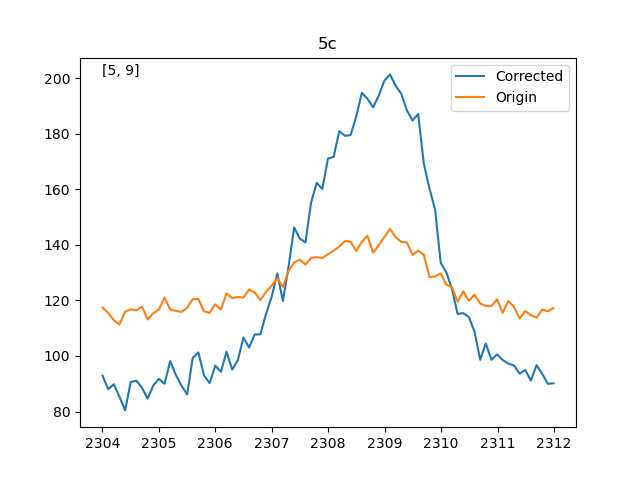

In [142]:
counter_XES = {'x':'xes_en_texs', 'signal':"gdall", "monitor":"I0t"}
source = Source(file, ok_3) #3-102 for XAS, #1-12 for XES
measurment_XES = Xes(source,counters=counter_XES)
measurment_XES.find_outliers()
measurment_XES.remove_outliers()
measurment_XES.normalize(mode = 'area')

source2 = Source(file, list(range(3,12)), None) #3-102 for XAS, #1-12 for XES
measurment_XES2 = Xas(source2,counters=counter_XES)
measurment_XES2.find_outliers()
measurment_XES2.remove_outliers()
measurment_XES2.normalize(mode = 'area')
#np.savetxt(q+'_XES_BT2.txt',np.c_[measurment_XES2.x*1000, measurment_XES2.signal] )
fig=plt.figure()

plt.plot(measurment_XES.x*1000, measurment_XES.signal, label='Corrected')
plt.plot(measurment_XES2.x*1000, measurment_XES2.signal, label='Origin')
plt.text(2304, measurment_XES.signal.max(), ok_3)

plt.title('%s'%q)
plt.legend()
#plt.savefig('5f correction.png', bbox_inches='tight')

In [113]:
measurment_XES.signal.max()

284.84425599738677